### Imports

In [26]:
from arcgis.gis import GIS
from ipywidgets import Layout
from PIL import Image
from keras.preprocessing import image
import requests
from io import BytesIO
from urllib.parse import urlencode
from os import listdir, remove, mkdir
from os.path import join, exists, expanduser, isdir
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
from file_utils import make_dir_helper, is_jpeg, delete_dir_helper

ModuleNotFoundError: No module named 'dill'

In [2]:
gis = GIS()

### Path Constants

In [3]:
PROJECT_DIR = join(expanduser('~'),'desktop','Esri Project');
MAP_NAME = 'map.jpg'
MAP_DIR = join(PROJECT_DIR, 'maps')
SLICED_DIR = join(MAP_DIR, 'sliced')

### Slice Constants

In [4]:
SLICE_WIDTH, SLICE_HEIGHT = 256, 256
MAP_WIDTH, MAP_HEIGHT = 4096, 2048

In [31]:
arc_map = gis.map('redlands')

arc_map.basemap = 'satellite'
arc_map

In [36]:
arc_map.__dict__

{'_click_handlers': <ipywidgets.widgets.widget.CallbackDispatcher at 0x146d398bef0>,
 '_cross_validation_lock': False,
 '_draw_end_handlers': <ipywidgets.widgets.widget.CallbackDispatcher at 0x146d398b0b8>,
 '_gis': <arcgis.gis.GIS at 0x146ca885470>,
 '_model_id': 'e7c283c043ad42e48d4f3570040d49a1',
 '_trait_notifiers': {'comm': {'change': [<traitlets.traitlets.ObserveHandler at 0x146ca8014e0>]},
  'config': {'change': [<traitlets.traitlets.ObserveHandler at 0x146c8a84ba8>]}},
 '_trait_validators': {},
 '_trait_values': {'_addlayer': '',
  '_arcgis_url': '',
  '_display_callbacks': <ipywidgets.widgets.widget.CallbackDispatcher at 0x146d3a021d0>,
  '_dom_classes': (),
  '_extent': '{"xmin": -117.25658999999995, "ymin": 33.98138000000007, "xmax": -117.10858999999995, "ymax": 34.12938000000007}',
  '_jsextent': '{"type":"extent","xmin":-13052349.951465232,"ymin":4028601.270438172,"xmax":-13014055.000294412,"ymax":4043888.6760951867,"spatialReference":{"wkid":102100,"latestWkid":3857}}',
 

### Download map using the current extent

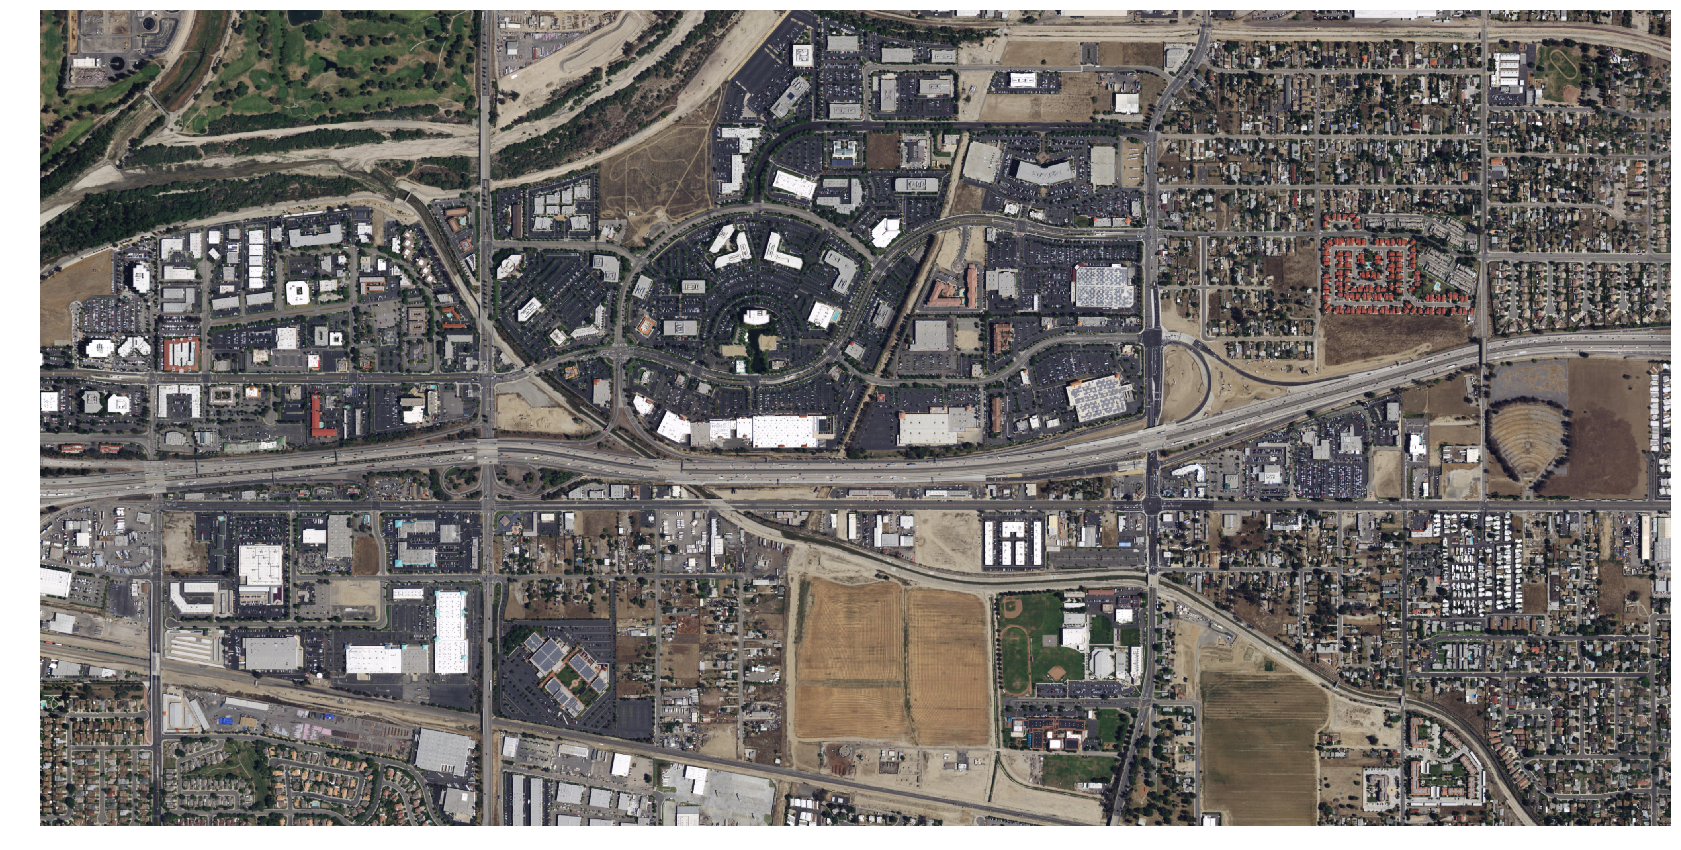

In [41]:
URL = 'https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/export?'
extent = arc_map.extent

parameters = {
    'bbox':'{},{},{},{}'.format(extent['xmin'], extent['ymin'], extent['xmax'], extent['ymax']),
    'bboxSR':extent['spatialReference']['latestWkid'],
    'size':'{},{}'.format(MAP_WIDTH, MAP_HEIGHT),
    'format':'jpg',
    'f':'image'
}

URL += urlencode(parameters)

MAP_FILE_PATH = join(MAP_DIR, MAP_NAME)

if urlretrieve(URL, MAP_FILE_PATH):
    
    img = image.load_img(MAP_FILE_PATH, target_size=(MAP_HEIGHT, MAP_WIDTH)) 
    plt.figure(figsize=(30, 15)) 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Slice map into tiles

In [ ]:
with Image.open(MAP_FILE_PATH) as im:
    imgwidth, imgheight = im.size
    WIDTH, HEIGHT = 256, 256
    idx = 0
    start_idx = 105
    for i in range(0, imgheight - SLICE_HEIGHT , SLICE_HEIGHT):
        for j in range(0, imgwidth - SLICE_WIDTH , SLICE_WIDTH):
            box = (j, i, j + SLICE_WIDTH, i + SLICE_HEIGHT)
            try:
                a = im.crop(box)
                a.save(join(SLICED_DIR, 'image_{}.jpg'.format(start_idx + idx)), "JPEG", quality=100, optimize=True)
            except:
                traceback.print_exc()
                pass
            idx +=1

### Predict slices based on model

In [ ]:
image_size = 256

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

fnames = [fname for fname in listdir(data_dir) if is_jpeg(fname)]
print(fnames)

for idx, fname in enumerate(fnames):

    img_path = join(data_dir, fname)

    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)) 
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    prediction = model.predict(x)[0]
    max_index = np.argmax(prediction)
    max_val = np.amax(prediction)

    pred_class = class_names[max_index]
    pred_class_dir = join(pred_dir, pred_class)
    make_dir_helper(pred_class_dir)

    img.save(join(pred_class_dir, 'image_{}.jpg'.format(idx)), "JPEG", quality=100, optimize=True)